In [1]:
from automate import *

2023-01-20 17:03:48.329147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

In [3]:
with (open("data.pkl", "rb")) as openfile:
    data = pickle.load(openfile)

data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data = [np.stack(col.values) for _, col in data.items()]
#X_train = tf.constant(df["CDR3"].to_numpy())
#X_train_v_gene = tf.constant(df["v_gene"].to_numpy())
#X_train_j_gene = tf.constant(df["j_gene"].to_numpy())
X_train = data

In [4]:
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1,CDR3_al_one_hot,CDR3_al_integer,label
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 1, 0, 0, 0, 0, 0, 14, 6, 17, 6,...",0
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 18, 1, 17, 6, 1...",0
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 10, 9, 18, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1...",0
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 19, 0, 0, 1, 16, 6, 15, 6, ...",0
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 10, 6, 19, 4, 1...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 16, 0, 0, 0, 0, 0, 0, 0, 6, 13,...",28
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 9, 0, 0, 0, 0, 0, 0, 15, 3, 16,...",28
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 14, 0, 0, 0, 0, 0, 10, 13, 6, 1...",28
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",28


Epoch 1/4


2023-01-20 17:03:55.235762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


7386/7386 [==============================] - 7s 949us/step - loss: 13.6387
Epoch 2/4
7386/7386 [==============================] - 7s 925us/step - loss: 9.8478
Epoch 3/4
7386/7386 [==============================] - 7s 912us/step - loss: 9.2751
Epoch 4/4
7386/7386 [==============================] - 7s 948us/step - loss: 9.0697


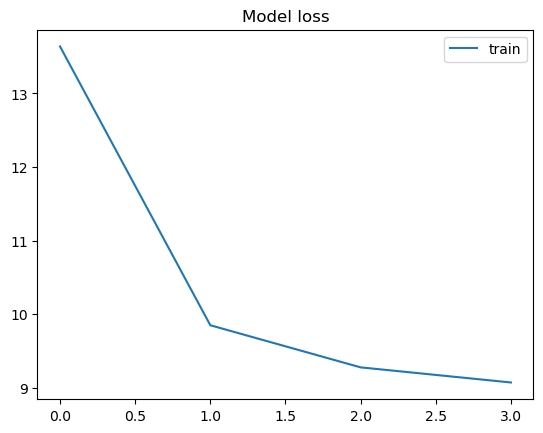

In [5]:
params = {  "n_inputs" : 20,
            "epochs": 4,
            "batch_size": 32,}
model_simple, encoder_simple = train_model_basic(df, X_train, params)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 40)          160         ['dense_4[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                         

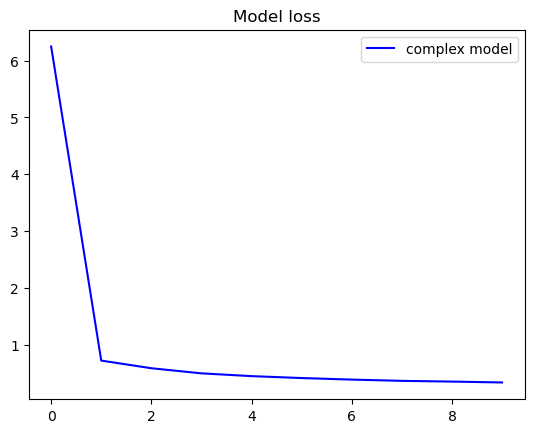

In [6]:
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.75,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 4,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }
model, encoder, decoder = train_model_complex(df, X_train, params=params)

In [7]:
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

In [8]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_55_524_ALRKVPTDNYITTY_KVPTDNYITTY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')
#mira_epitope_55_524_ALRKVPTDNYITTY_KVPTDNYITTY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv
#mira_epitope_70_345_DTDFVNEFYAY_NRDVDTDFVNEFY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv NO
#mira_epitope_90_216_GYQPYRVVVL_PYRVVVLSF_QPYRVVVL_QPYRVVVLSF.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv NO
#mira_epitope_53_532_NYLYRLFRK_NYNYLYRLF.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv CASSETSGYEQYF NO
## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index(f['cdr3_b_aa'][0])

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample = df[df["CDR3"].isin(group)]
print(len(sample))
print(sample["label"].unique())

58
1183
[ 20 217  75 246]


In [9]:
#count values label
sample["label"].value_counts()

20     1142
217      33
75        5
246       3
Name: label, dtype: int64

In [10]:
sample = sample[sample["label"] == 20]
sample["file"] = 0

In [11]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_67_382_APHGVVFL_APHGVVFLHV_GVVFLHVTY_VVFLHVTYV.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')
## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index(f['cdr3_b_aa'][0])

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample2 = df[df["CDR3"].isin(group)]
print(len(sample2))
print(sample2["label"].unique())

30
1856
[219  25  71]


In [12]:
#count values label
sample2["label"].value_counts()

25     1794
219      31
71       31
Name: label, dtype: int64

In [13]:
sample2 = sample2[sample2["label"] == 25]
sample2["file"] = 1

In [14]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_70_345_DTDFVNEFYAY_NRDVDTDFVNEFY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')
## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index(f['cdr3_b_aa'][0])

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample3 = df[df["CDR3"].isin(group)]
print(len(sample3))
print(sample3["label"].unique())

25
687
[111  70  50 121   7   8  64 250]


In [15]:
#count values label
sample3["label"].value_counts()

50     567
121     48
111     24
70      24
8       15
7        5
64       2
250      2
Name: label, dtype: int64

In [16]:
sample3 = sample3[sample3["label"] == 50]
sample3["file"] = 2

In [17]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

ModuleNotFoundError: No module named 'pyrepseq'

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

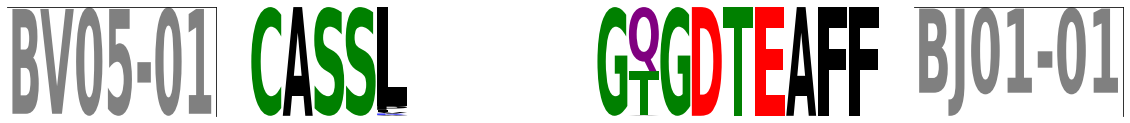

In [ ]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample2, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

In [18]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample3, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

ModuleNotFoundError: No module named 'pyrepseq'

In [19]:
groups_index = list(sample.index) + list(sample2.index) + list(sample3.index)
X_test = X_train.copy()
for i in range(len(X_test)):
    X_test[i] = X_test[i][groups_index]
print(X_test[0].shape)

(3503, 20)


In [20]:
#dump pickle X_test
import pickle
with open('X_train_metaclonotypes_3groups.pkl', 'wb') as f:
    pickle.dump(X_test, f)

In [38]:
df = pd.concat([sample, sample2, sample3])
len(df)

3503

In [39]:
df.reset_index(inplace=True, drop=True)
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1,CDR3_al_one_hot,CDR3_al_integer,label,file
0,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
1,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
2,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
3,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
4,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,CASSPGGSEQYF,CASSP--------GGSEQYF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGSEQYF+TCRBV18-01+TCRBJ02-07,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eXL30,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ02-07,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2
3499,CASSPGGTGYTF,CASSP--------GGTGYTF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGTGYTF+TCRBV18-01+TCRBJ01-02,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-02,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2
3500,CASSPGGQKLFF,CASSP--------GGQKLFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGQKLFF+TCRBV18-01+TCRBJ01-04,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eXL30,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-04,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2
3501,CASSPGGTRLFF,CASSP--------GGTRLFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGTRLFF+TCRBV18-01+TCRBJ01-04,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-04,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2


In [40]:
df.to_csv("metaclonotypes_tcrdist_3groups.csv", index=False)

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization_10 (BatchN  (None, 40)          160         ['dense_17[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                        

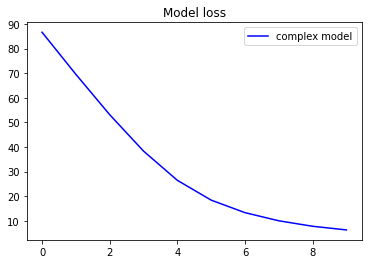

In [80]:
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.75,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 4,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }
model, encoder, decoder = train_model_complex(df, X_test, params=params)

In [81]:
X_test_encode = encoder.predict(X_test)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test_encode)
plot_X_test = principalComponents

In [85]:
df.columns

Index(['CDR3', 'CDR3_al', 'tokenized_smiles', 'TCR BioIdentity',
       'TCR Nucleotide Sequence', 'Experiment', 'ORF Coverage', 'Amino Acids',
       'Start Index in Genome', 'End Index in Genome', 'v_gene', 'j_gene',
       'Amino Acids 1', 'CDR3_al_one_hot', 'CDR3_al_integer', 'label', 'file',
       'file_color', 'file_kmeans_label'],
      dtype='object')

  0%|          | 0/3503 [00:00<?, ?it/s]

(3503, 20)


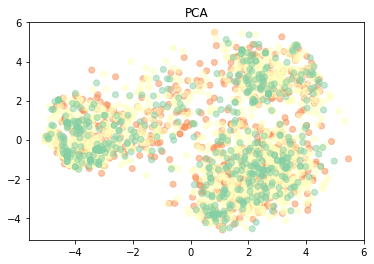

In [115]:
label = "file"
labels = []
labels_encoder = LabelEncoder()
labels_encoder = labels_encoder.fit(df[label].unique())
for k in tqdm(df.index):
    labels.append(labels_encoder.transform([df.loc[k,label]]))
labels = [int(y) for y in labels]
df[label] = labels
rgb_values = sns.color_palette("Spectral", df[label].nunique())
df[str(label+"_color")] = df[label].apply(lambda x: rgb_values[x])
print(X_test_encode.shape)
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=df[str(label+"_color")], alpha=0.5)
plt.title("PCA")
plt.show()

In [116]:
df[label].value_counts()

1    1794
0    1142
2     567
Name: file, dtype: int64

Accuracy:  0.5121324578932344


C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


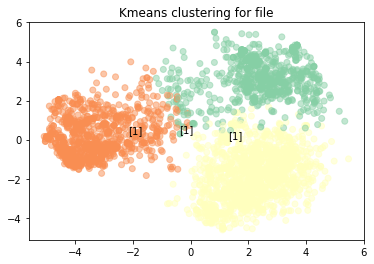

In [117]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode)
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
df[str(label+"_kmeans_label")] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label_ind = df[df[str(label+"_kmeans_label")] == cluster][label].value_counts().index[0]
    label_dict[cluster] = label_ind

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(df[str(label+"_kmeans_label")], df[label])])/len(df))
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=col_kmeans, alpha=0.5)
centroids = kmeans.cluster_centers_
for cluster in range(k):
    plt.text(centroids[cluster,0], centroids[cluster,1], labels_encoder.inverse_transform([label_dict[cluster]]), fontsize=10)
plt.title("Kmeans clustering for "+label)
plt.show()

In [123]:
df[df[str(label+"_kmeans_label")] == 2]

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1,CDR3_al_one_hot,CDR3_al_integer,label,file,file_color,file_kmeans_label
12272,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0,"(0.9748558246828143, 0.5574009996155325, 0.322...",2
12273,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eMR12,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0,"(0.9748558246828143, 0.5574009996155325, 0.322...",2
12279,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eMR12,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0,"(0.9748558246828143, 0.5574009996155325, 0.322...",2
12287,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD137,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0,"(0.9748558246828143, 0.5574009996155325, 0.322...",2
12292,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eHO134,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0,"(0.9748558246828143, 0.5574009996155325, 0.322...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117654,CASSPGGNTIYF,CASSP--------GGNTIYF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGNTIYF+TCRBV18-01+TCRBJ01-03,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-03,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2,"(0.5273356401384084, 0.8106113033448674, 0.645...",2
117656,CASSPGGNTIYF,CASSP--------GGNTIYF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGNTIYF+TCRBV18-01+TCRBJ01-03,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ01-03,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2,"(0.5273356401384084, 0.8106113033448674, 0.645...",2
117704,CASSPGGSEQYF,CASSP--------GGSEQYF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGSEQYF+TCRBV18-01+TCRBJ02-07,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eXL30,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEFY",15641,15685,TCRBV18-01,TCRBJ02-07,DTDFVNEFYAY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",50,2,"(0.5273356401384084, 0.8106113033448674, 0.645...",2
117806,CASSPGGTRLFF,CASSP--------GGTRLFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGGTRLFF+TCRBV18-01+TCRBJ01-04,CTGAGGATCCAGCAGGTAGTGCGAGGAGATTCGGCAGCTTATTTCT...,eEE226,ORF1ab,"DTDFVNEFYAY,NRDVDTDFVNEF

1    696
0    436
2    211
Name: file, dtype: int64
1343
1    710
0    459
2    220
Name: file, dtype: int64
1389
1    388
0    247
2    136
Name: file, dtype: int64
771


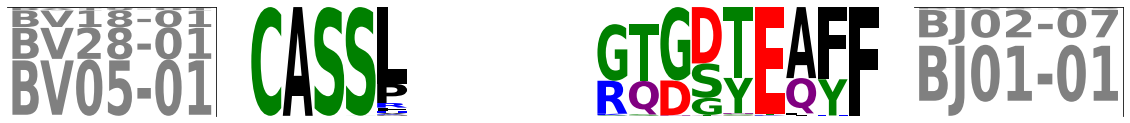

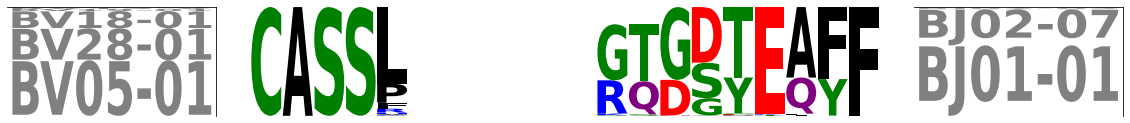

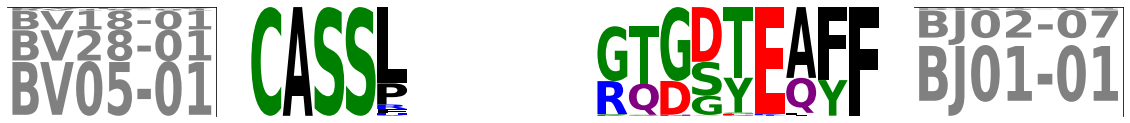

In [126]:
# Plot logos for each kmeans group 
for cluster in range(k):
    fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),gridspec_kw=dict(width_ratios=(1, 3, 1),wspace=0.1, hspace=0.5))
    cluster_df = df[df[str(label+"_kmeans_label")] == cluster]
    print(cluster_df["file"].value_counts())
    print(len(cluster_df))
    rsp.seqlogos_vj(cluster_df, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

[20 25]


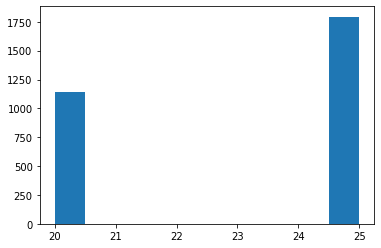

In [27]:
print(df["label"].unique())
plt.hist(df["label"], bins=10)
plt.show()

In [28]:
# Kmeans for 3 groups and logos of them 
# VAE train only on 3 metaclonotypes
# Try kmeans for 3 groups on the sequences (BASELINE) or KNN (mutations and neighbours, sklearn)